In [1]:
# Import necessary packages
%matplotlib inline
import os
import csv
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import linregress

In [2]:
# Load in the Austin crime dataset
datafile = 'Resources/Crime_Reports.csv'

In [3]:
data = pd.read_csv(datafile)
data.head(100)

,Incident Number,Highest Offense Description,Highest Offense Code,Family Violence,Occurred Date Time,Occurred Date,Occurred Time,Report Date Time,Report Date,Report Time,...,Census Tract,Clearance Status,Clearance Date,UCR Category,Category Description,X-coordinate,Y-coordinate,Latitude,Longitude,Location
0,2.017115e+08,AGG ASLT STRANGLE/SUFFOCATE,410,Y,1/1/2017 10:30,1/1/2017,1030,1/1/2017 11:58,1/1/2017,1158,...,NaN,C,1/10/2017,13A,Aggravated Assault,3130704.0,3130704.0,30.359794,-97.688358,"(30.35979391, -97.688358)"
1,2.017100e+08,AGG ASSAULT,402,N,1/1/2017 0:07,1/1/2017,7,1/1/2017 0:07,1/1/2017,7,...,NaN,NaN,NaN,13A,Aggravated Assault,3114768.0,3114768.0,30.268162,-97.741362,"(30.26816195, -97.74136237)"
2,2.017109e+08,AGG ASSAULT,402,N,1/1/2017 4:20,1/1/2017,420,1/1/2017 4:20,1/1/2017,420,...,NaN,N,3/8/2017,13A,Aggravated Assault,3131193.0,3131193.0,30.318604,-97.687937,"(30.3186038, -97.68793685)"
3,2.017503e+10,AGG ASSAULT FAM/DATE VIOLENCE,402,Y,1/1/2017 0:00,1/1/2017,0,8/10/2017 8:30,8/10/2017,830,...,NaN,O,8/17/2017,13A,Aggravated Assault,3099695.0,3099695.0,30.196029,-97.791021,"(30.1960291, -97.79102086)"
4,2.019239e+10,AGG FORCED SODOMY,1718,N,1/1/2017 21:29,1/1/2017,2129,8/27/2019 21:29,8/27/2019,2129,...,NaN,C,10/29/2019,11B,Rape,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.017108e+08,DWI .15 BAC OR ABOVE,2111,N,1/1/2017 3:19,1/1/2017,319,1/1/2017 3:19,1/1/2017,319,...,NaN,C,1/14/2017,NaN,NaN,3122483.0,3122483.0,30.304849,-97.715922,"(30.30484886, -97.71592248)"
96,2.017125e+08,DWI 2ND,2102,N,1/1/2017 22:10,1/1/2017,2210,1/1/2017 22:10,1/1/2017,2210,...,NaN,C,1/2/2017,NaN,NaN,3120610.0,3120610.0,30.398318,-97.719328,"(30.3983179, -97.71932765)"
97,2.017124e+08,DWI 2ND,2102,N,1/1/2017 21:11,1/1/2017,2111,1/1/2017 21:11,1/1/2017,2111,...,NaN,C,1/2/2017,NaN,NaN,3115476.0,3115476.0,30.193997,-97.741110,"(30.19399698, -97.74111045)"
98,2.017119e+08,EVADING / FOOT,2723,N,1/1/2017 16:19,1/1/2017,1619,1/1/2017 16:19,1/1/2017,1619,...,NaN,C,1/1/2017,NaN,NaN,3125100.0,3125100.0,30.261960,-97.708794,"(30.26195977, -97.70879365)"


In [4]:
data.columns

Index(['Incident Number', 'Highest Offense Description',
       'Highest Offense Code', 'Family Violence', 'Occurred Date Time',
       'Occurred Date', 'Occurred Time', 'Report Date Time', 'Report Date',
       'Report Time', 'Location Type', 'Address', 'Zip Code',
       'Council District', 'APD Sector', 'APD District', 'PRA', 'Census Tract',
       'Clearance Status', 'Clearance Date', 'UCR Category',
       'Category Description', 'X-coordinate', 'Y-coordinate', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [5]:
Newdata = data.drop(columns=["Incident Number", "Highest Offense Code", "Family Violence", 'Occurred Date', 'Report Date Time', 'Report Date',
       'Report Time', 'Address', 'Council District', 'APD Sector', 'Clearance Status', 'Clearance Date', 'UCR Category', 'X-coordinate', 'Y-coordinate', 'Latitude', 'Longitude'])
Newdata.head()

,Highest Offense Description,Occurred Date Time,Occurred Time,Location Type,Zip Code,APD District,PRA,Census Tract,Category Description,Location
0,AGG ASLT STRANGLE/SUFFOCATE,1/1/2017 10:30,1030,HOTEL / MOTEL / ETC.,78753.0,1,240.0,NaN,Aggravated Assault,"(30.35979391, -97.688358)"
1,AGG ASSAULT,1/1/2017 0:07,7,STREETS / HWY / ROAD / ALLEY,78701.0,2,381.0,NaN,Aggravated Assault,"(30.26816195, -97.74136237)"
2,AGG ASSAULT,1/1/2017 4:20,420,PARKING LOTS / GARAGE,78723.0,3,294.0,NaN,Aggravated Assault,"(30.3186038, -97.68793685)"
3,AGG ASSAULT FAM/DATE VIOLENCE,1/1/2017 0:00,0,RESIDENCE / HOME,78745.0,3,526.0,NaN,Aggravated Assault,"(30.1960291, -97.79102086)"
4,AGG FORCED SODOMY,1/1/2017 21:29,2129,RESIDENCE / HOME,78753.0,7,241.0,NaN,Rape,NaN


In [6]:
Highest_Offense_Description = Newdata['Highest Offense Description'].value_counts()
Highest_Offense_Description

FAMILY DISTURBANCE                25728
BURGLARY OF VEHICLE               23572
THEFT                             18444
CRIMINAL MISCHIEF                 12923
ASSAULT W/INJURY-FAM/DATE VIOL     8100
                                  ...  
VIOL STATE MASSAGE REGULATIONS        1
KIDNAPPING FAM VIO                    1
VIOL OF COURT ORDER-NON EPO-PO        1
AIRPORT - BOMB THREAT                 1
OBSCENITY                             1
Name: Highest Offense Description, Length: 361, dtype: int64

In [7]:
range_time_crime = Newdata.loc[(Newdata['Occurred Time'] == 1800)]
range_time_crime = range_time_crime.sort_values(by =['Occurred Time'],ascending=True) 
range_time_crime

,Highest Offense Description,Occurred Date Time,Occurred Time,Location Type,Zip Code,APD District,PRA,Census Tract,Category Description,Location
214,WARRANT ARREST NON TRAFFIC,1/1/2017 18:00,1800,GAS / SERVICE STATIONS,78751.0,6,291.0,NaN,NaN,"(30.31742345, -97.70811883)"
169090,FAMILY DISTURBANCE,2/10/2020 18:00,1800,RESIDENCE / HOME,78745.0,3,492.0,NaN,NaN,"(30.20636343, -97.76216827)"
169117,SUSPICIOUS PERSON,2/10/2020 18:00,1800,RESIDENCE / HOME,78705.0,2,358.0,NaN,NaN,"(30.28575808, -97.74828021)"
169125,THEFT,2/10/2020 18:00,1800,RESIDENCE / HOME,78759.0,7,177.0,NaN,Theft,"(30.4110599, -97.74808698)"
169135,THEFT,2/10/2020 18:00,1800,OTHER / UNKNOWN,78727.0,3,828.0,NaN,Theft,"(30.43403582, -97.69521088)"
...,...,...,...,...,...,...,...,...,...,...
88768,BURGLARY OF VEHICLE,11/8/2018 18:00,1800,RESIDENCE / HOME,78757.0,7,262.0,NaN,Theft,"(30.34768518, -97.71697363)"
89020,ASSAULT W/INJURY-FAM/DATE VIOL,11/10/2018 18:00,1800,RESIDENCE / HOME,78758.0,2,236.0,NaN,NaN,"(30.37239143, -97.71561186)"
89043,BURGLARY OF VEHICLE,11/10/2018 18:00,1800,PARKING LOTS / GARAGE,78748.0,2,542.0,NaN,Theft,"(30.17073165, -97.81256147)"
87939,BURGLARY NON RESIDENCE,11/2/2018 18:00,1800,COMMERCIAL / OFFICE BUILDING,78746.0,1,449.0,NaN,Burglary,"(30.26123241, -97.78668695)"


In [8]:
CrimeTime_df = Newdata[["Highest Offense Description","Occurred Time"]].loc[:]
CrimeTime_df = CrimeTime_df.sort_values(by = "Occurred Time")
CrimeTime_df["Occurred Time"]

74045        0
25229        0
181252       0
181243       0
181214       0
          ... 
365       2359
133740    2359
141500    2359
145096    2359
152445    2359
Name: Occurred Time, Length: 236462, dtype: int64

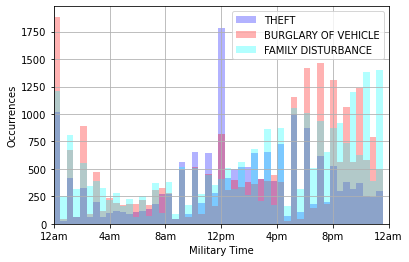

In [9]:
Mischief = CrimeTime_df.loc[(CrimeTime_df ['Highest Offense Description'] == 'FAMILY DISTURBANCE' )]
Burglary = CrimeTime_df.loc[(CrimeTime_df ['Highest Offense Description'] == 'BURGLARY OF VEHICLE')]               
Thievery = CrimeTime_df.loc[(CrimeTime_df ['Highest Offense Description'] == 'THEFT')]


plt.hist(Thievery['Occurred Time'], label='THEFT',color = 'blue',bins=50,alpha=0.3)

plt.hist(Burglary['Occurred Time'], label='BURGLARY OF VEHICLE',color = 'red',bins=50,alpha=0.3)
plt.hist(Mischief['Occurred Time'], label='FAMILY DISTURBANCE',color = 'cyan',bins=50,alpha=0.3)



plt.xlim(0,2400)
plt.xticks([0,400,800,1200,1600,2000,2400],['12am','4am','8am','12pm','4pm','8pm','12am'])
plt.xlabel("Military Time")
plt.ylabel("Occurrences")
plt.legend()
plt.grid()
plt.savefig("shaine figures/allcrimes.png")
plt.show()


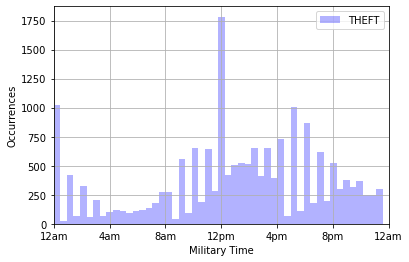

In [10]:
plt.hist(Thievery['Occurred Time'], label='THEFT',color = 'blue',bins=50,alpha=0.3)

plt.xlim(0,2400)
plt.xticks([0,400,800,1200,1600,2000,2400],['12am','4am','8am','12pm','4pm','8pm','12am'])
plt.xlabel("Military Time")
plt.ylabel("Occurrences")
plt.legend()
plt.grid()
plt.savefig("shaine figures/theft.png")
plt.show()


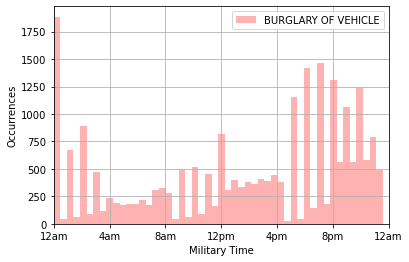

In [11]:
plt.hist(Burglary['Occurred Time'], label='BURGLARY OF VEHICLE',color = 'red',bins=50,alpha=0.3)

plt.xlim(0,2400)
plt.xticks([0,400,800,1200,1600,2000,2400],['12am','4am','8am','12pm','4pm','8pm','12am'])
plt.xlabel("Military Time")
plt.ylabel("Occurrences")
plt.legend()
plt.grid()
plt.savefig("shaine figures/burglary.png")
plt.show()


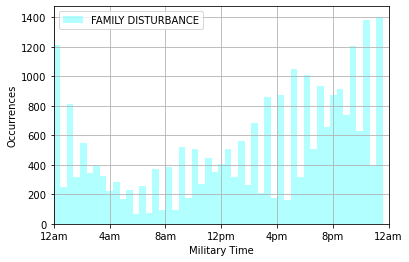

In [12]:
plt.hist(Mischief['Occurred Time'], label='FAMILY DISTURBANCE',color = 'cyan',bins=50,alpha=0.3)

plt.xlim(0,2400)
plt.xticks([0,400,800,1200,1600,2000,2400],['12am','4am','8am','12pm','4pm','8pm','12am'])
plt.xlabel("Military Time")
plt.ylabel("Occurrences")
plt.legend()
plt.grid()
plt.savefig("shaine figures/familydisturb.png")
plt.show()
